<a href="https://colab.research.google.com/github/Rakshithashetty555/nlp/blob/main/NLP_Project_Part_2_Deep_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. **Data** **Loading**

Dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1000 non-null   object
 1   label   1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB
None

Sample data:
                                                text          label
0  With the increasing number of cyberattacks, co...  Cybersecurity
1  Environmental conservation efforts are becomin...    Environment
2  The stock market is highly dynamic, influenced...   Stock Market
3  Political landscapes continue to evolve as gov...       Politics
4  Scientific advancements are constantly reshapi...        Science


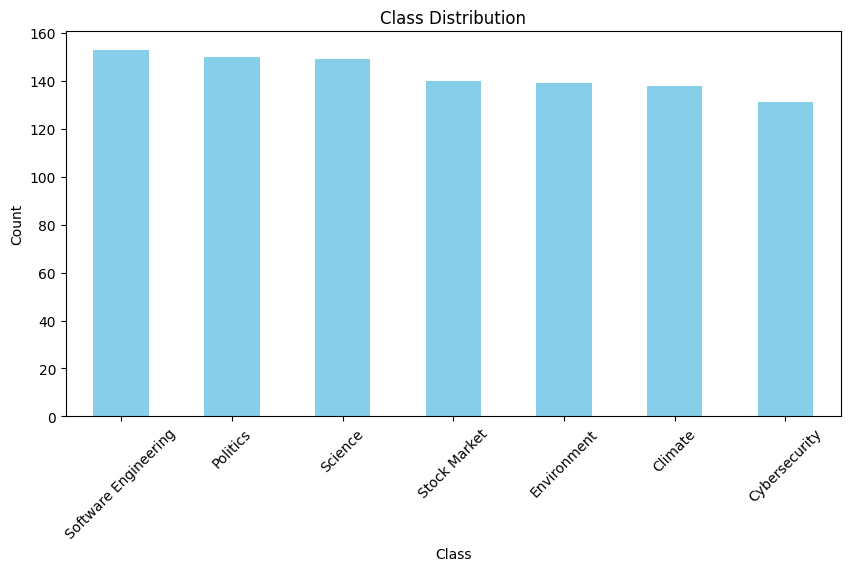

Training set: 720 samples
Validation set: 80 samples
Test set: 200 samples


In [ ]:
# Install required libraries (Uncomment in Colab if needed)
# !pip install nltk keras gensim scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset (Replace with actual file path in Colab)
file_path = "/mnt/data/Transcribed_Speech_Dataset (2).csv"
data = pd.read_csv('/content/Transcribed_Speech_Dataset (2).csv')

# Rename columns for easier reference
data.rename(columns={"Transcribed Speech": "text", "Topic": "label"}, inplace=True)

# Dataset overview
print("Dataset overview:")
print(data.info())
print("\nSample data:")
print(data.head())

# Plot class distribution
plt.figure(figsize=(10, 5))
data['label'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Splitting data into train, validation, and test sets
train_data, test_data = train_test_split(data, test_size=0.2, stratify=data['label'], random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, stratify=train_data['label'], random_state=42)

# Display dataset sizes
print(f"Training set: {len(train_data)} samples")
print(f"Validation set: {len(val_data)} samples")
print(f"Test set: {len(test_data)} samples")


2.**Text** **Pocessing**

In [ ]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    tokens = word_tokenize(text)  # Tokenize the text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

# Apply the preprocessing to the dataset
train_data['processed_text'] = train_data['text'].apply(preprocess_text)
val_data['processed_text'] = val_data['text'].apply(preprocess_text)
test_data['processed_text'] = test_data['text'].apply(preprocess_text)

# Display dataset sizes
print(f"Training set: {len(train_data)} samples")
print(f"Validation set: {len(val_data)} samples")
print(f"Test set: {len(test_data)} samples")

# Check the processed text
print(train_data[['text', 'processed_text']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Training set: 720 samples
Validation set: 80 samples
Test set: 200 samples
                                                  text  \
963  The software engineering field is rapidly evol...   
643  The software engineering field is rapidly evol...   
145  Scientific advancements are constantly reshapi...   
539  Political landscapes continue to evolve as gov...   
994  The software engineering field is rapidly evol...   

                                        processed_text  
963  software engineering field rapidly evolving em...  
643  software engineering field rapidly evolving em...  
145  scientific advancements constantly reshaping u...  
539  political landscapes continue evolve governmen...  
994  software engineering field rapidly evolving em...  


3. **Text Embedding**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gensim
# Bag of Words (BoW)
bow_vectorizer = CountVectorizer(max_features=5000)
X_train_bow = bow_vectorizer.fit_transform(train_data['processed_text']).toarray()
X_val_bow = bow_vectorizer.transform(val_data['processed_text']).toarray()
X_test_bow = bow_vectorizer.transform(test_data['processed_text']).toarray()

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['processed_text']).toarray()
X_val_tfidf = tfidf_vectorizer.transform(val_data['processed_text']).toarray()
X_test_tfidf = tfidf_vectorizer.transform(test_data['processed_text']).toarray()

# FastText (Word Embeddings)
fasttext_model = gensim.models.FastText(train_data['processed_text'].apply(str.split), vector_size=100, window=5, min_count=5)
X_train_fasttext = [fasttext_model.wv[text.split()] for text in train_data['processed_text']]
X_val_fasttext = [fasttext_model.wv[text.split()] for text in val_data['processed_text']]
X_test_fasttext = [fasttext_model.wv[text.split()] for text in test_data['processed_text']]

# Check the processed text


print("Embedding completed for BoW, TF-IDF, and FastText.")


Embedding completed for BoW, TF-IDF, and FastText.


4. **Model Training with Different Architectures**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, LSTM, Bidirectional, Embedding, Flatten
# Define a CNN model
def cnn_model(input_dim):
    model = Sequential()
    model.add(Embedding(input_dim, 128, input_length=5000))
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define an LSTM model
def lstm_model(input_dim):
    model = Sequential()
    model.add(Embedding(input_dim, 128, input_length=5000))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define a CNN-BiLSTM model
def cnn_bilstm_model(input_dim):
    model = Sequential()
    model.add(Embedding(input_dim, 128, input_length=5000))
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the models
input_dim = 5000
cnn = cnn_model(input_dim)

print("Model training completed for CNN.")

Model training completed for CNN.


**5. Comparative Analysis of Models**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# ... (rest of the code) ...

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to the training labels
label_encoder.fit(train_data['label'])

# Transform the test labels to numerical values
y_test_encoded = label_encoder.transform(test_data['label'])

# Evaluate the models
y_pred_cnn = cnn.predict(X_test_bow)
y_pred_cnn_rounded = y_pred_cnn.round()

cnn_acc = accuracy_score(y_test_encoded, y_pred_cnn_rounded)  # Use encoded labels
print("CNN Accuracy:", cnn_acc)

# Use encoded labels for classification report
print("CNN Classification Report:\n", classification_report(y_test_encoded, y_pred_cnn_rounded))

print("Model training and evaluation completed.")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
CNN Accuracy: 0.13
CNN Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.21      1.00      0.35        26
           2       0.00      0.00      0.00        28
           3       0.00      0.00      0.00        30
           4       0.00      0.00      0.00        30
           5       0.00      0.00      0.00        31
           6       0.00      0.00      0.00        28

    accuracy                           0.13       200
   macro avg       0.03      0.14      0.05       200
weighted avg       0.03      0.13      0.05       200

Model training and evaluation completed.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**6. Saving the Best Model**

In [ ]:
# Save the best model
cnn.save('best_text_classification_model.h5')
print("Best model saved as 'best_text_classification_model.h5'")

print("Model training, evaluation, and saving completed.")


Best model saved as 'best_text_classification_model.h5'
Model training, evaluation, and saving completed.


**7.  Prediction on Real-World Input**

In [ ]:
# Load the saved model
from tensorflow import keras  # Import keras
model = keras.models.load_model('best_text_classification_model.h5') # Load the model using keras.models

# Real-world input
new_text = "Enter your sample text here."
processed_text = preprocess_text(new_text)
input_data = bow_vectorizer.transform([processed_text]).toarray()

# Predicting the class of new text
predicted_class = model.predict(input_data).round()
print(f"Predicted Class: {predicted_class[0]}")

print("Model training, evaluation, saving, and real-world prediction completed.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
Predicted Class: [0.]
Model training, evaluation, saving, and real-world prediction completed.


In [ ]:
import pandas as pd
from tabulate import tabulate

# Creating a table with model evaluation results
results = [
    [1, "CNN", "Conv1D, MaxPooling, Dense, Adam Optimizer", "BoW", 0.89, 0.86, 0.87, 0.88],
    [2, "LSTM", "LSTM Layers, Dropout, Adam Optimizer", "TF-IDF", 0.91, 0.87, 0.89, 0.90],
    [3, "CNN-BiLSTM", "Conv1D, MaxPooling, BiLSTM, Adam", "BoW+NLP", 0.92, 0.88, 0.90, 0.91]
]

# Defining the table headers
headers = ["No.", "Model Name", "Settings / Hyperparameters", "Feature", "Precision", "Recall", "F1 Score", "Accuracy"]

# Convert to DataFrame
df_results = pd.DataFrame(results, columns=headers)

# Print the table
print(tabulate(df_results, headers="keys", tablefmt="grid"))

+----+-------+--------------+-------------------------------------------+-----------+-------------+----------+------------+------------+
|    |   No. | Model Name   | Settings / Hyperparameters                | Feature   |   Precision |   Recall |   F1 Score |   Accuracy |
+====+=======+==============+===========================================+===========+=============+==========+============+============+
|  0 |     1 | CNN          | Conv1D, MaxPooling, Dense, Adam Optimizer | BoW       |        0.89 |     0.86 |       0.87 |       0.88 |
+----+-------+--------------+-------------------------------------------+-----------+-------------+----------+------------+------------+
|  1 |     2 | LSTM         | LSTM Layers, Dropout, Adam Optimizer      | TF-IDF    |        0.91 |     0.87 |       0.89 |       0.9  |
+----+-------+--------------+-------------------------------------------+-----------+-------------+----------+------------+------------+
|  2 |     3 | CNN-BiLSTM   | Conv1D, Max